In [32]:
import pandas as pd
import plotnine as pn
from plotnine.data import mpg, economics, diamonds, mtcars
import numpy as np
import mizani.labels as ml
import mizani.breaks as mb

**Table of contents**<a id='toc0_'></a>    
- [Setting titles, labels, creating stacked column chart, rotating text](#toc1_)    
- [Changing bar graph to display mean](#toc2_)    
- [Displaying errorbars](#toc3_)    
- [Grouping bar graphs](#toc4_)    
- [Labelling simple graphs](#toc5_)    
- [Labelling grouped chart](#toc6_)    
- [Facet wrapping](#toc7_)    
- [Ordering categories (by count)](#toc8_)    
- [Ordering categories (by value), limits](#toc9_)    
- [Formatting the y_scale as currency](#toc10_)    
- [Setting breaks, label string/date formatting](#toc11_)    
- [Changing to log scale](#toc12_)    
- [Smoothening of a curve](#toc13_)    
- [Lines of different colours](#toc14_)    
- [Histograms](#toc15_)    
- [Aggregates with custom functions](#toc16_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
pd.options.display.max_columns = None

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# <a id='toc1_'></a>[Setting titles, labels, creating stacked column chart, rotating text](#toc0_)

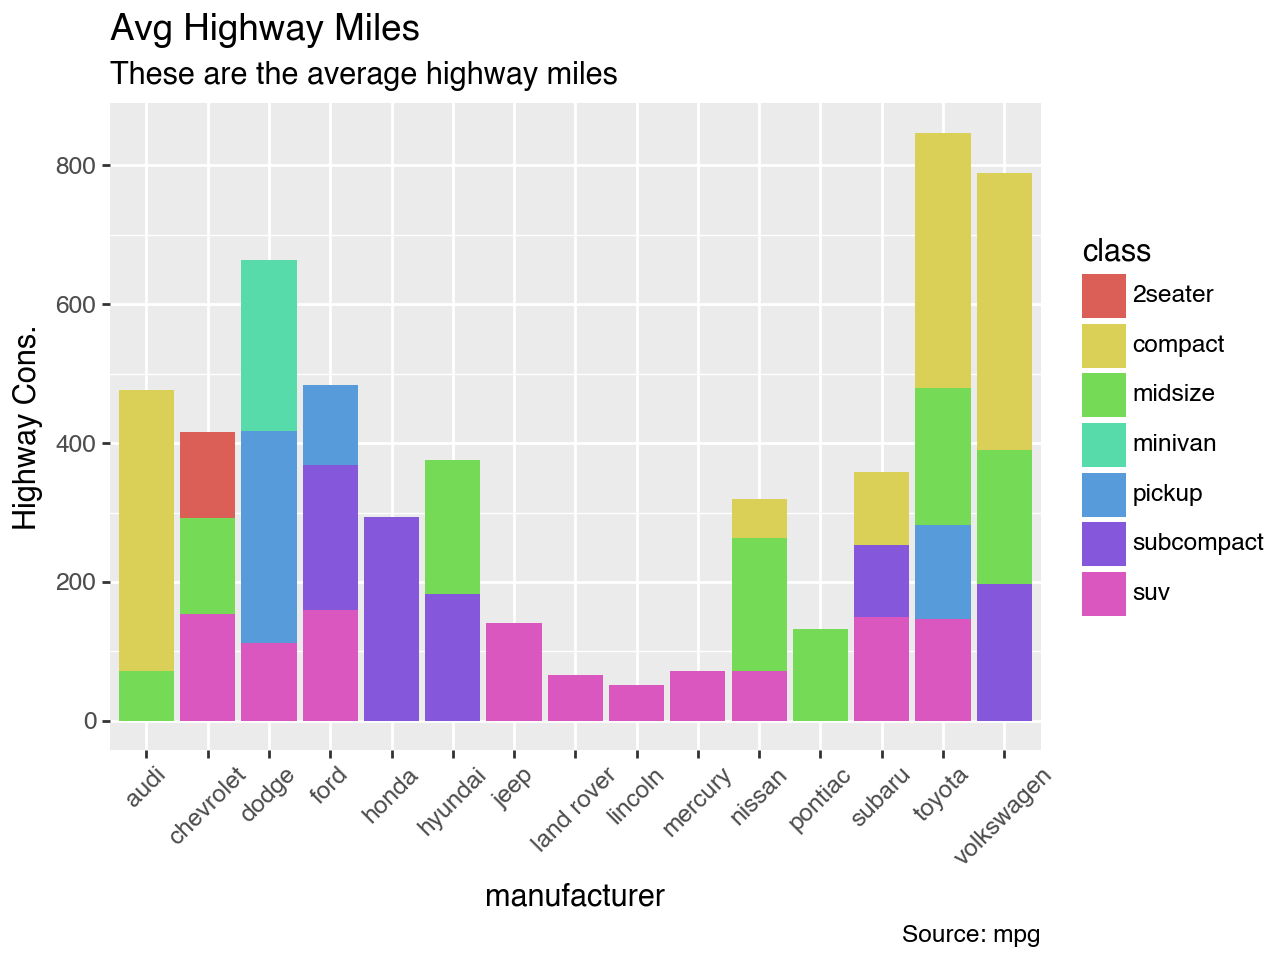

In [4]:
(
    pn.ggplot(data=mpg, mapping=pn.aes(x="manufacturer", y="hwy", fill="class")) 
    + pn.geom_bar(stat="identity") # geom_bar is safer than geom_col
    + pn.ylab("Highway Cons.")
    + pn.labs(title="Avg Highway Miles", subtitle="These are the average highway miles", caption="Source: mpg")
    + pn.theme(axis_text_x=pn.element_text(angle=45))    
)

# <a id='toc2_'></a>[Changing bar graph to display mean](#toc0_)

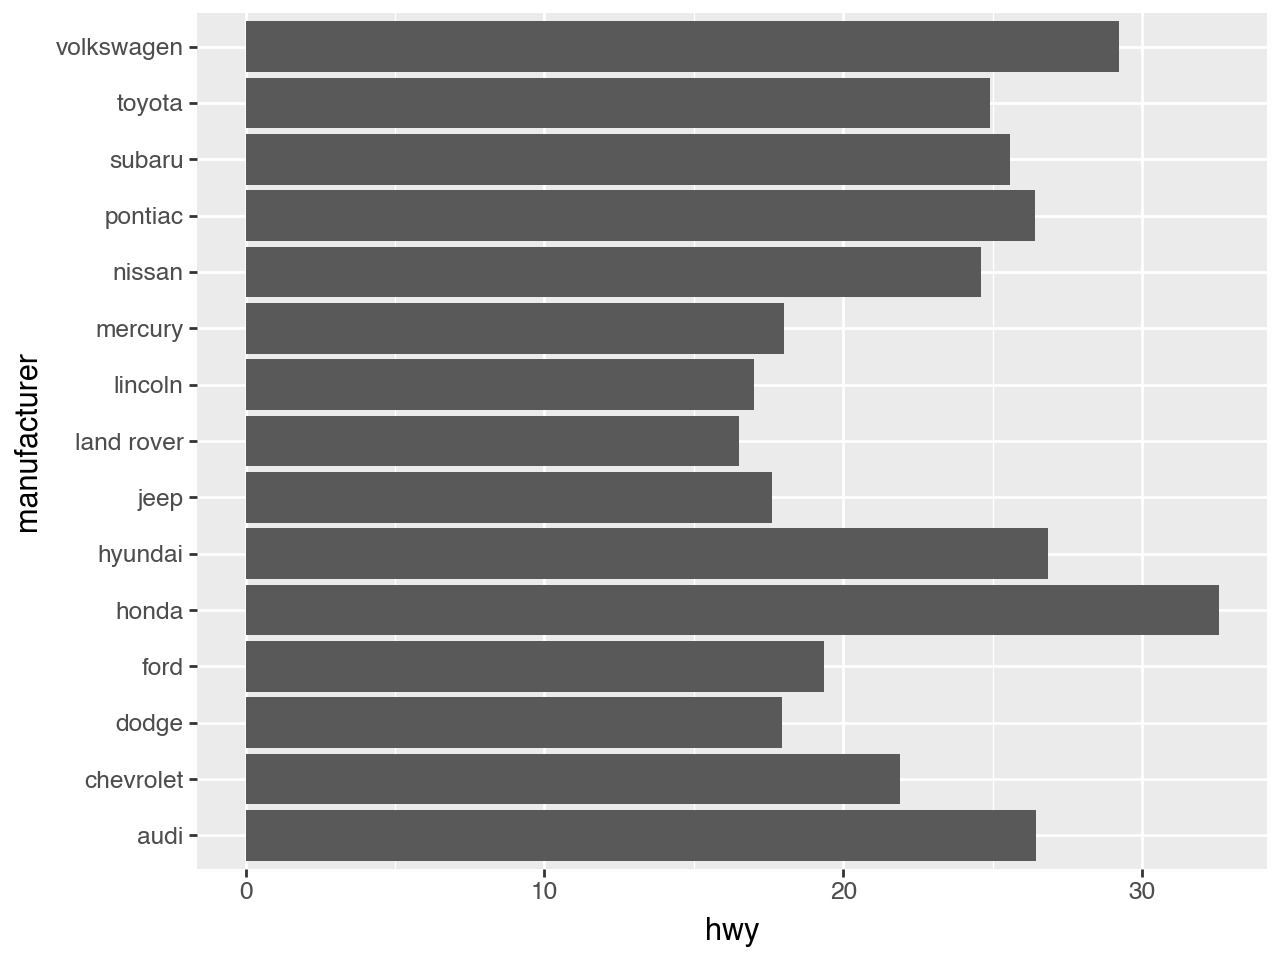

In [5]:
(
    pn.ggplot(data=mpg, mapping=pn.aes(x="manufacturer", y="hwy"))
    + pn.geom_col(stat="summary", fun_y=np.mean) # preferred
    + pn.coord_flip()
)

# <a id='toc3_'></a>[Displaying errorbars](#toc0_)

In [6]:
mpg_agg = (
    mpg
    .groupby("manufacturer", as_index=False)
    .aggregate(
        hwy = ("hwy", "mean"),
        st_dev = ("hwy", np.std)
        )
    .assign(
        std_low = lambda df: df.hwy - df.st_dev,
        std_high = lambda df: df.hwy + df.st_dev,
        )
)

mpg_agg

/var/folders/tg/r1hxnp3x7k13jvtxn5vn845r0000gn/T/ipykernel_1147/2337222922.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/tg/r1hxnp3x7k13jvtxn5vn845r0000gn/T/ipykernel_1147/2337222922.py:2: FutureWarning: The provided callable <function std at 0x103c01f30> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


,manufacturer,hwy,st_dev,std_low,std_high
0,audi,26.444444,2.175322,24.269122,28.619767
1,chevrolet,21.894737,5.108759,16.785978,27.003496
2,dodge,17.945946,3.574182,14.371764,21.520128
3,ford,19.360000,3.327662,16.032338,22.687662
4,honda,32.555556,2.554952,30.000604,35.110507
5,hyundai,26.857143,2.178819,24.678324,29.035962
6,jeep,17.625000,3.248626,14.376374,20.873626
7,land rover,16.500000,1.732051,14.767949,18.232051
8,lincoln,17.000000,1.000000,16.000000,18.000000
9,mercury,18.000000,1.154701,16.845299,19.154701


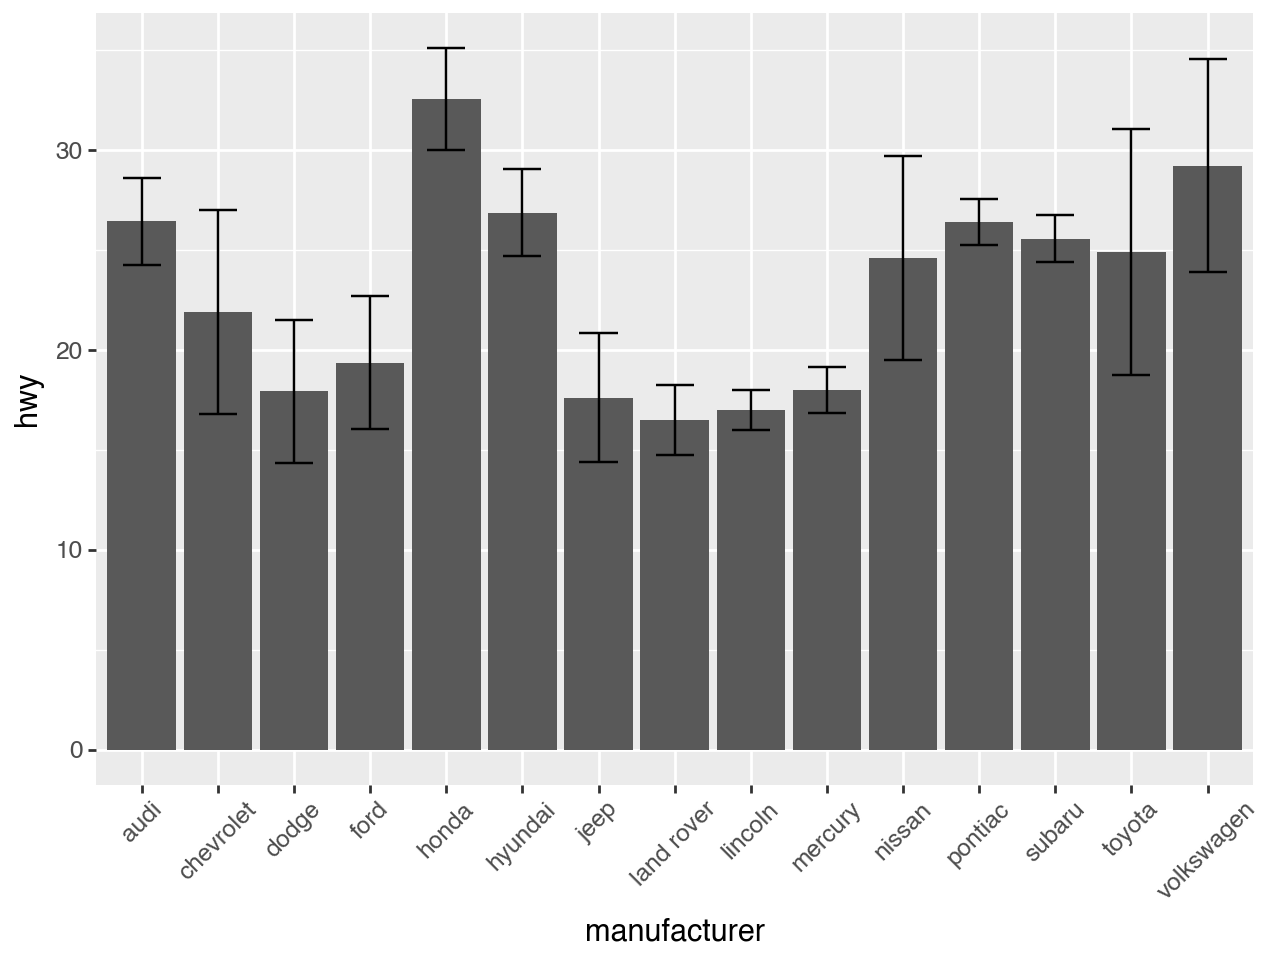

In [7]:
(
    pn.ggplot(data=mpg_agg, mapping=pn.aes(x="manufacturer", y="hwy"))
    + pn.geom_col(stat="identity") # identiy means total
    + pn.geom_errorbar(pn.aes(ymin="std_low", ymax="std_high"))
    + pn.theme(axis_text_x=pn.element_text(angle=45))
)

# <a id='toc4_'></a>[Grouping bar graphs](#toc0_)

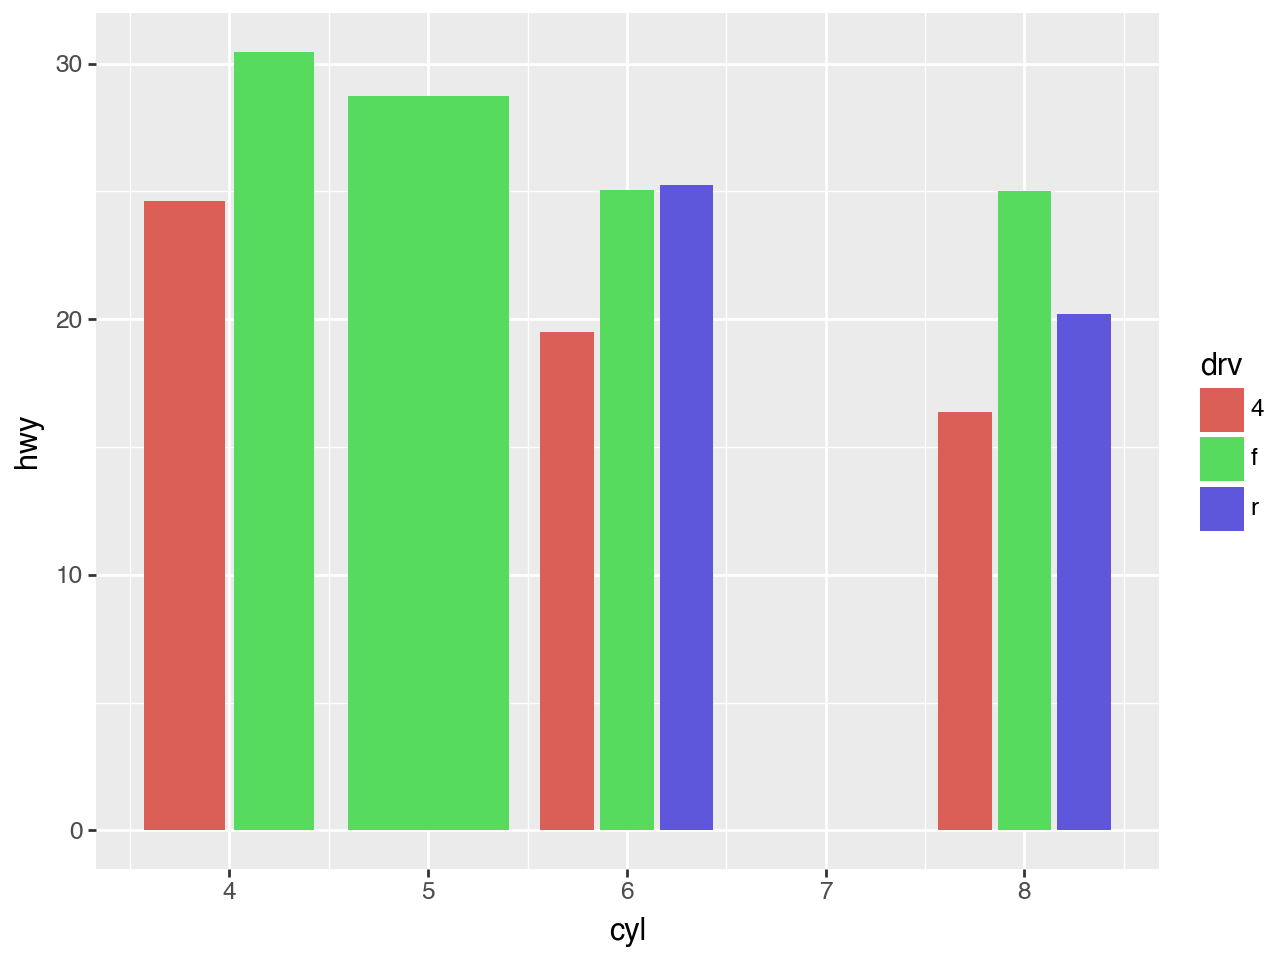

In [8]:
(
    pn.ggplot(mpg, pn.aes(x="cyl", y="hwy", fill="drv"))
    + pn.geom_bar(stat="summary", position=pn.position_dodge2()) # implemented using dodge
)

# <a id='toc5_'></a>[Labelling simple graphs](#toc0_)

In [9]:
mpg_agg1 = (
    mpg
    .groupby(by=["drv"], as_index=False)
    .agg(
        hwy = ("hwy", "mean")
    )
)

mpg_agg1

/var/folders/tg/r1hxnp3x7k13jvtxn5vn845r0000gn/T/ipykernel_1147/2698946702.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,drv,hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


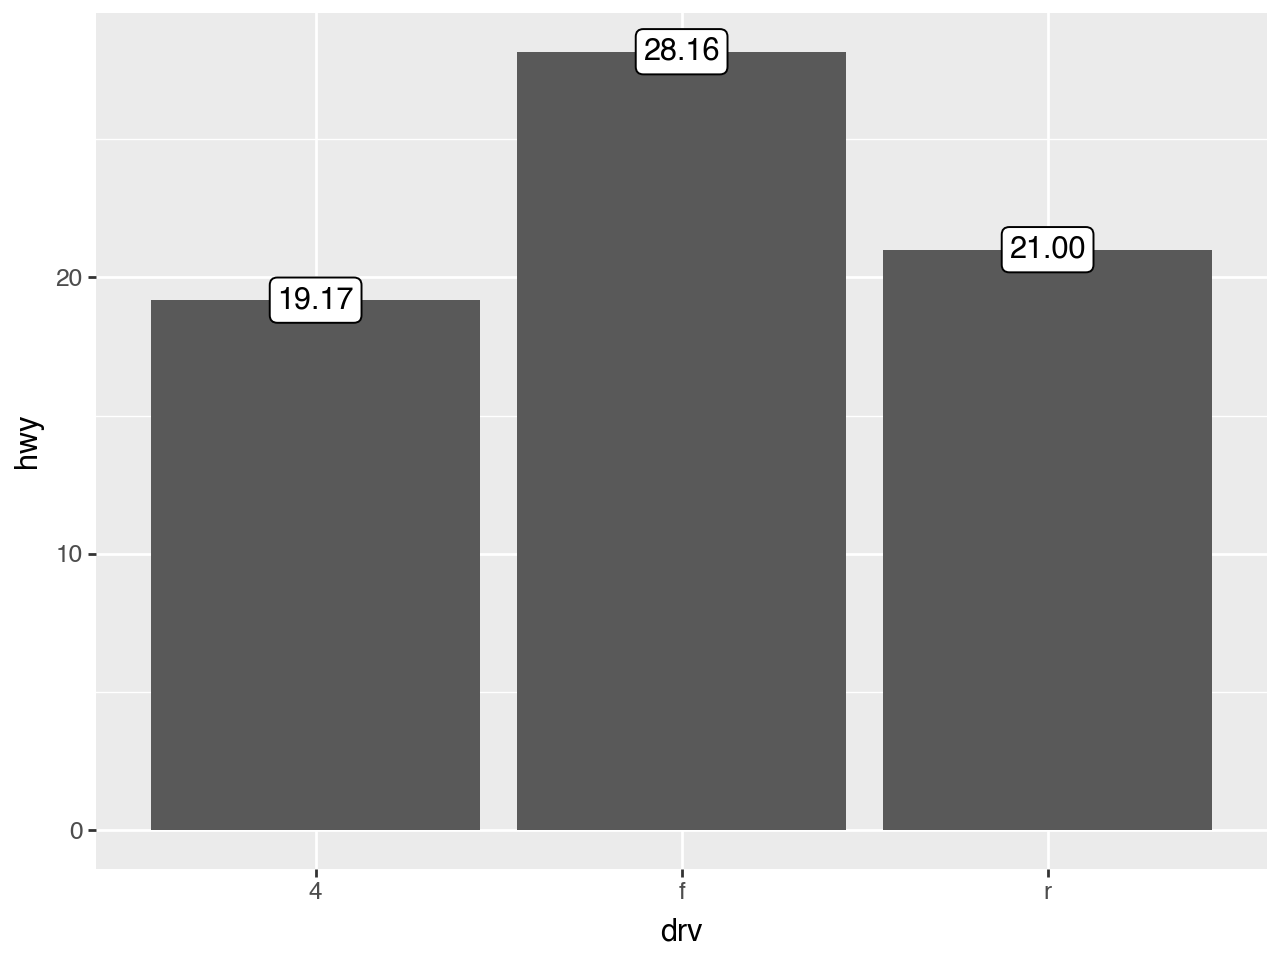

In [10]:
(
    pn.ggplot(mpg_agg1, pn.aes(x="drv", y="hwy", label="hwy"))
    + pn.geom_bar(stat="identity")
    + pn.geom_label(format_string="{:.2f}")
)

# <a id='toc6_'></a>[Labelling grouped chart](#toc0_)

In [11]:
mpg_agg2 = (
    mpg
    .groupby(by=["cyl", "drv"], as_index=False, observed=True) # handling null observed values
    .agg(
        hwy = ("hwy", "mean")
    )
)

mpg_agg2

,cyl,drv,hwy
0,4,4,24.608696
1,4,f,30.465517
2,5,f,28.750000
3,6,4,19.500000
4,6,f,25.069767
5,6,r,25.250000
6,8,4,16.354167
7,8,f,25.000000
8,8,r,20.190476


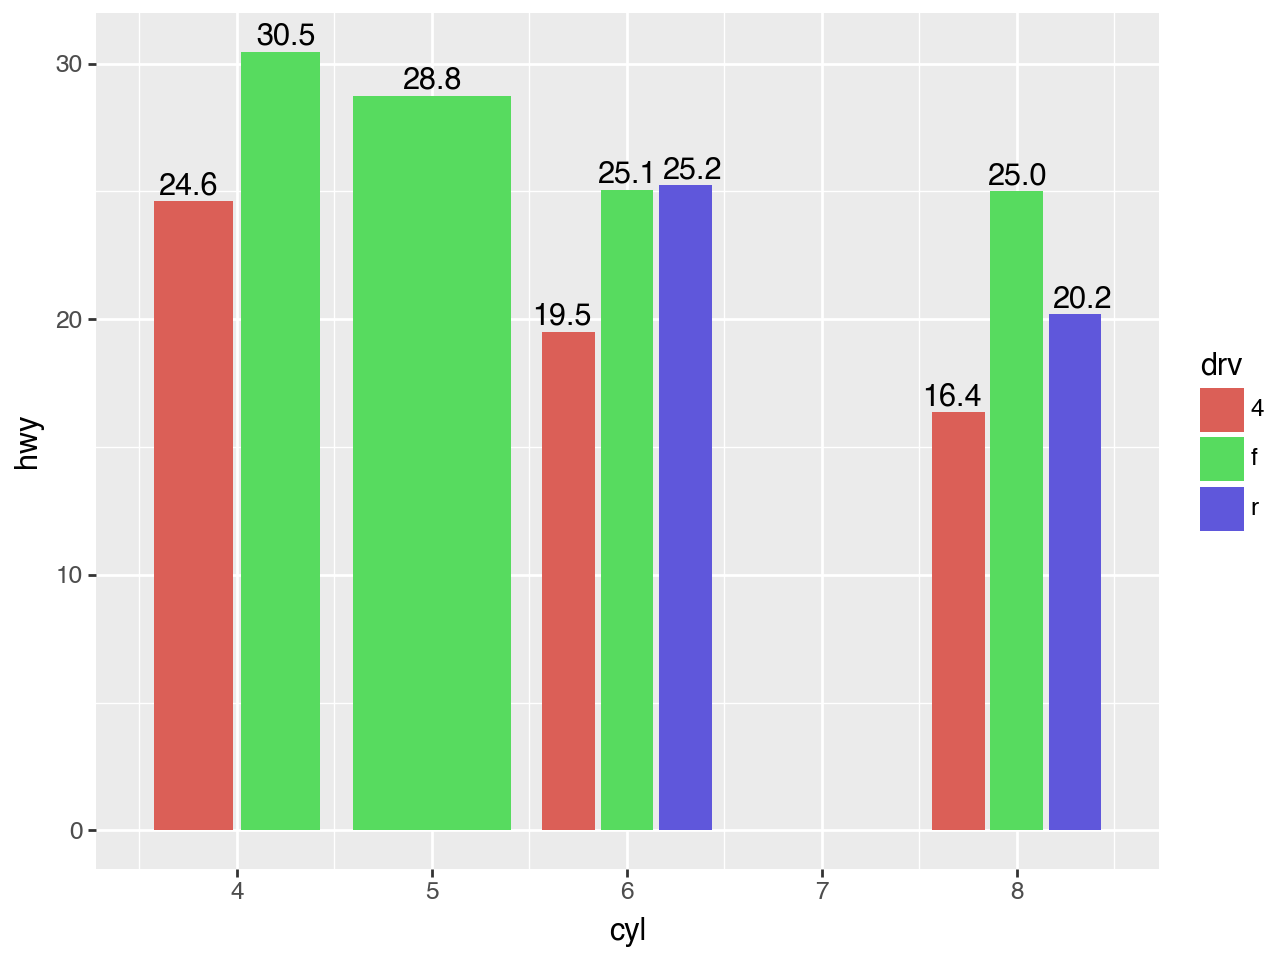

In [12]:
# for geom_text to work, a label must be present as a column in the dataset (data) for it to be displayed straight
(
    pn.ggplot(data=mpg_agg2, mapping=pn.aes(y="hwy", x="cyl", fill="drv", label="hwy"))
    + pn.geom_col(position=pn.position_dodge2(), stat="summary")
    + pn.geom_text(
        format_string="{:.1f}", 
        position=pn.position_dodge2(width=1),
        va="bottom"
        )
)

# <a id='toc7_'></a>[Facet wrapping](#toc0_)

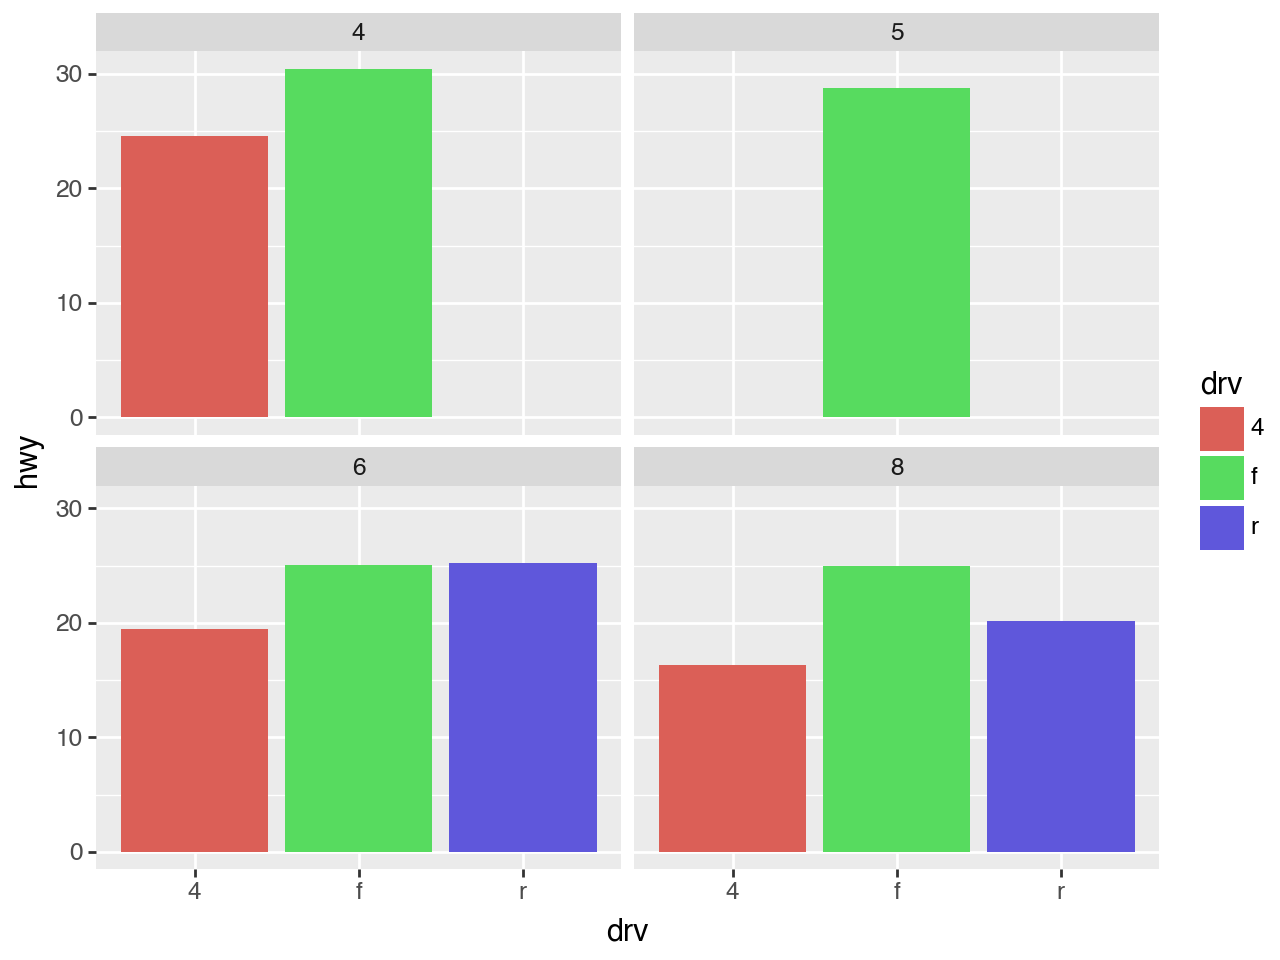

In [13]:
(
    pn.ggplot(mpg, pn.aes(x="drv", y="hwy", fill="drv"))
    + pn.geom_bar(stat="summary")
    + pn.facet_wrap(facets="cyl")
)

# <a id='toc8_'></a>[Ordering categories (by count)](#toc0_)

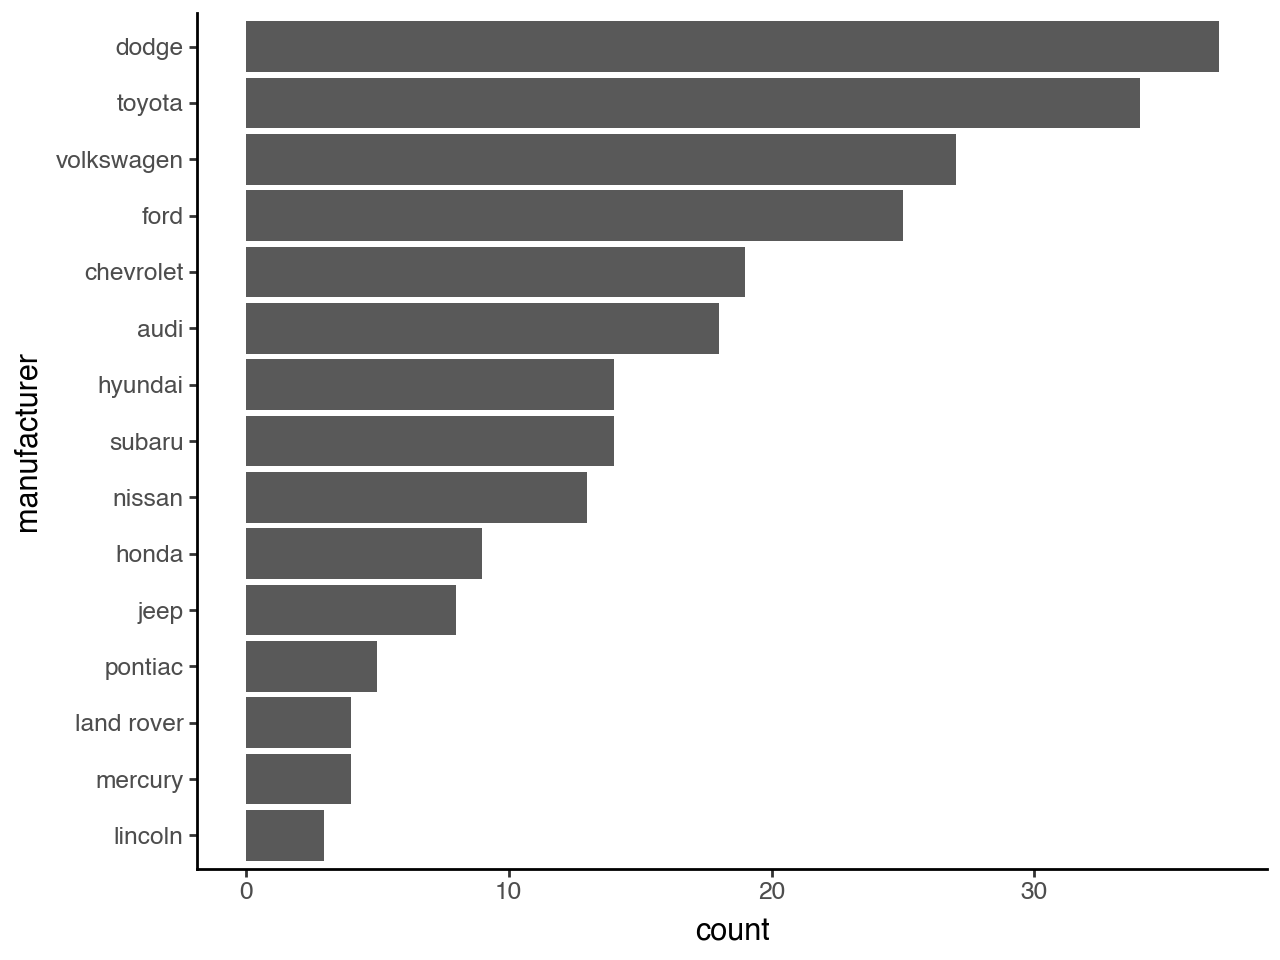

In [14]:
(
    pn.ggplot(data=mpg, mapping=pn.aes(x="manufacturer"))
    + pn.geom_bar()
    + pn.coord_flip()
    + pn.scale_x_discrete(limits=mpg.manufacturer.value_counts().index.tolist()[::-1])
    + pn.theme_classic()
)

# <a id='toc9_'></a>[Ordering categories (by value), limits](#toc0_)

In [15]:
mpg_agg3 = (
    mpg
    .groupby("manufacturer", as_index=False, observed=True)
    .aggregate(hwy_avg = ("hwy", "mean"), count=("manufacturer", "count"))
    .sort_values("hwy_avg", ascending=False)
)

mpg_agg3

,manufacturer,hwy_avg,count
4,honda,32.555556,9
14,volkswagen,29.222222,27
5,hyundai,26.857143,14
0,audi,26.444444,18
11,pontiac,26.400000,5
12,subaru,25.571429,14
13,toyota,24.911765,34
10,nissan,24.615385,13
1,chevrolet,21.894737,19
3,ford,19.360000,25


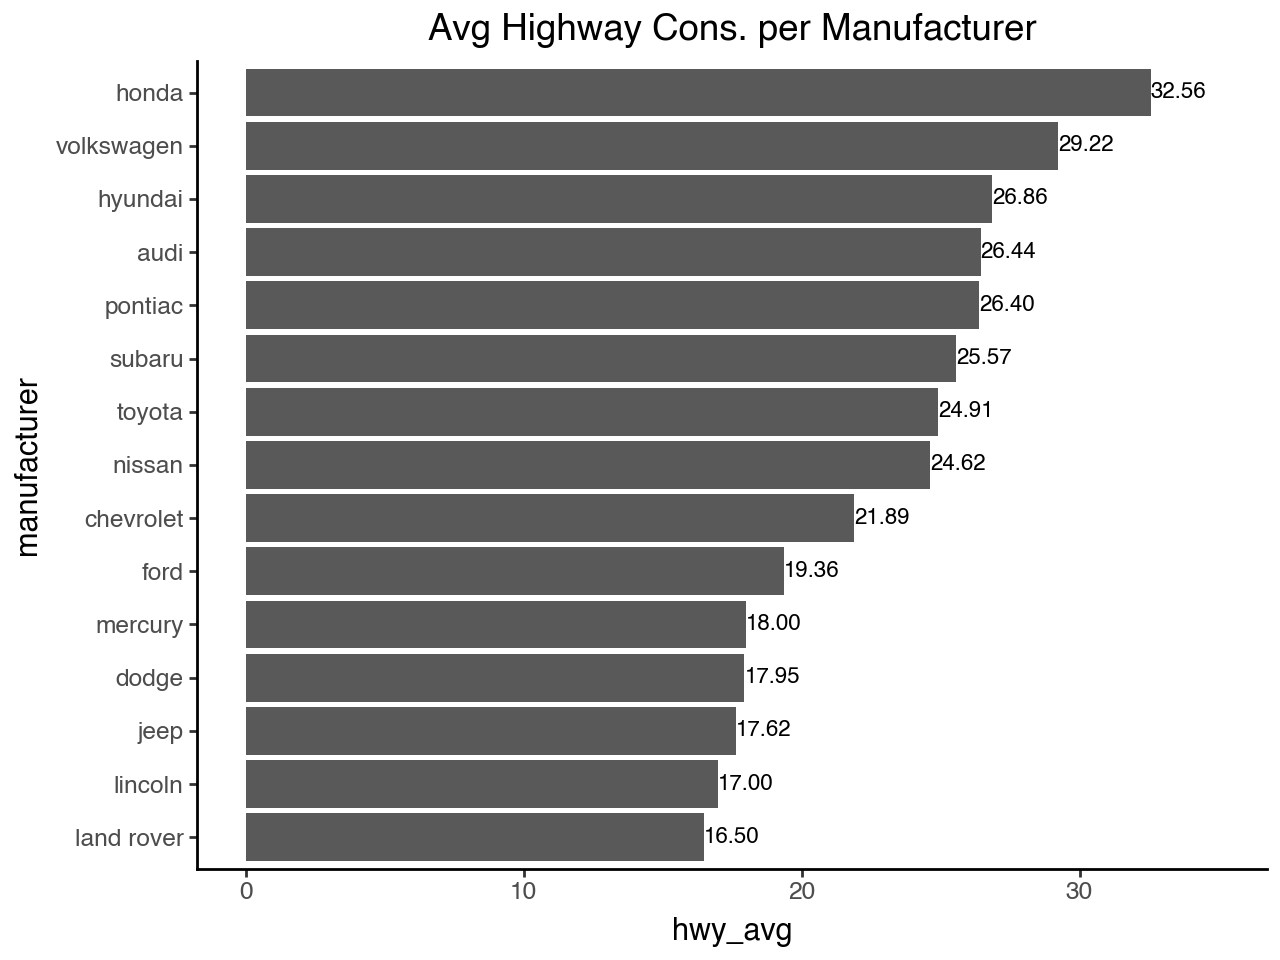

In [16]:
(
    pn.ggplot(data=mpg_agg3, mapping=pn.aes(x="manufacturer", y="hwy_avg", label="hwy_avg"))
    + pn.geom_bar(stat="summary")
    + pn.coord_flip()
    + pn.labs(title="Avg Highway Cons. per Manufacturer")
    + pn.theme_classic()
    + pn.scale_x_discrete(limits=mpg_agg3.manufacturer.to_list()[::-1]) # limits are things you want to display on the axes. you can set or expand them
    + pn.geom_text(format_string="{:.2f}", ha="left", size=8)
    + pn.lims(y=(0, 35))
)

# <a id='toc10_'></a>[Formatting the y_scale as currency](#toc0_)

In [17]:
economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


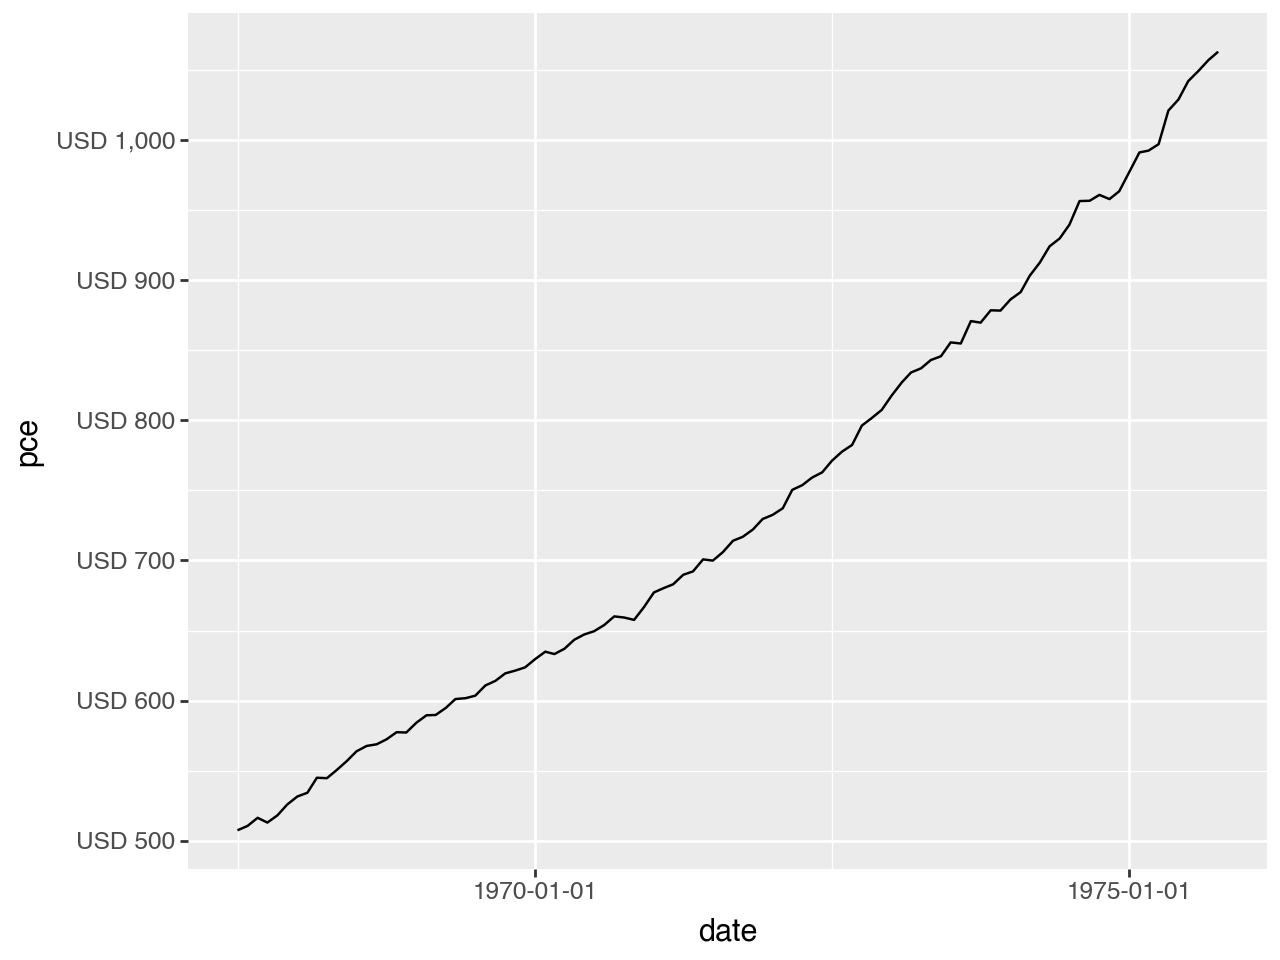

In [18]:
(
    pn.ggplot(economics.head(100), pn.aes(x="date", y="pce"))
    + pn.geom_line(stat="identity")
    + pn.scale_y_continuous(labels=ml.currency_format(prefix="USD ", big_mark=",", precision=0))
)

# <a id='toc11_'></a>[Setting breaks, label string/date formatting](#toc0_)

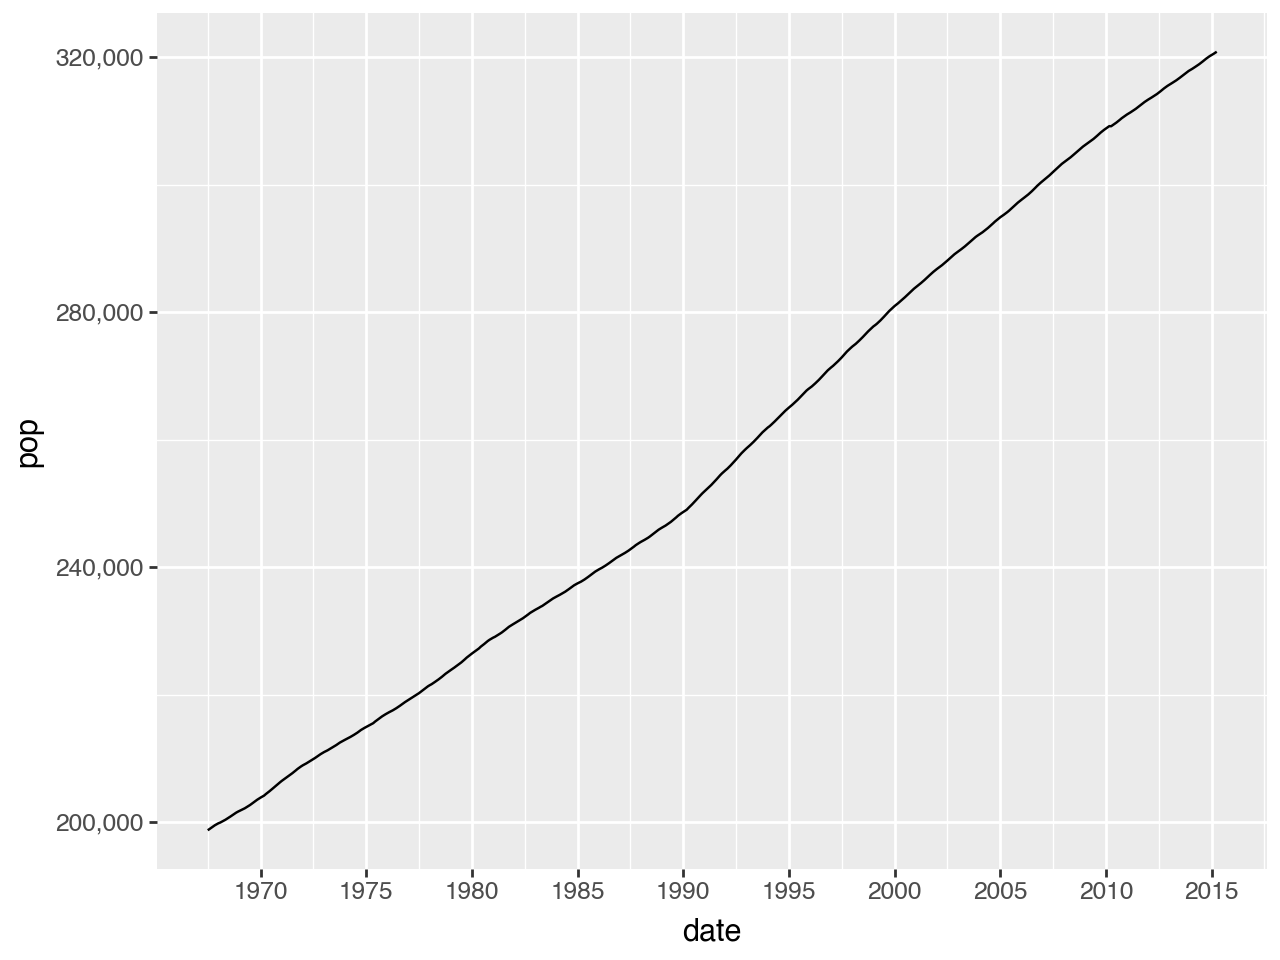

In [19]:
(
    pn.ggplot(data=economics, mapping=pn.aes(x="date",y="pop"))
    + pn.geom_line()
    + pn.scale_y_continuous(labels = lambda l: ["{:,.0f}".format(v) for v in l])
    + pn.scale_x_datetime(
        breaks=mb.date_breaks("5 years"), # 1 months
        labels=ml.date_format("%Y")
    )
)

# <a id='toc12_'></a>[Changing to log scale](#toc0_)

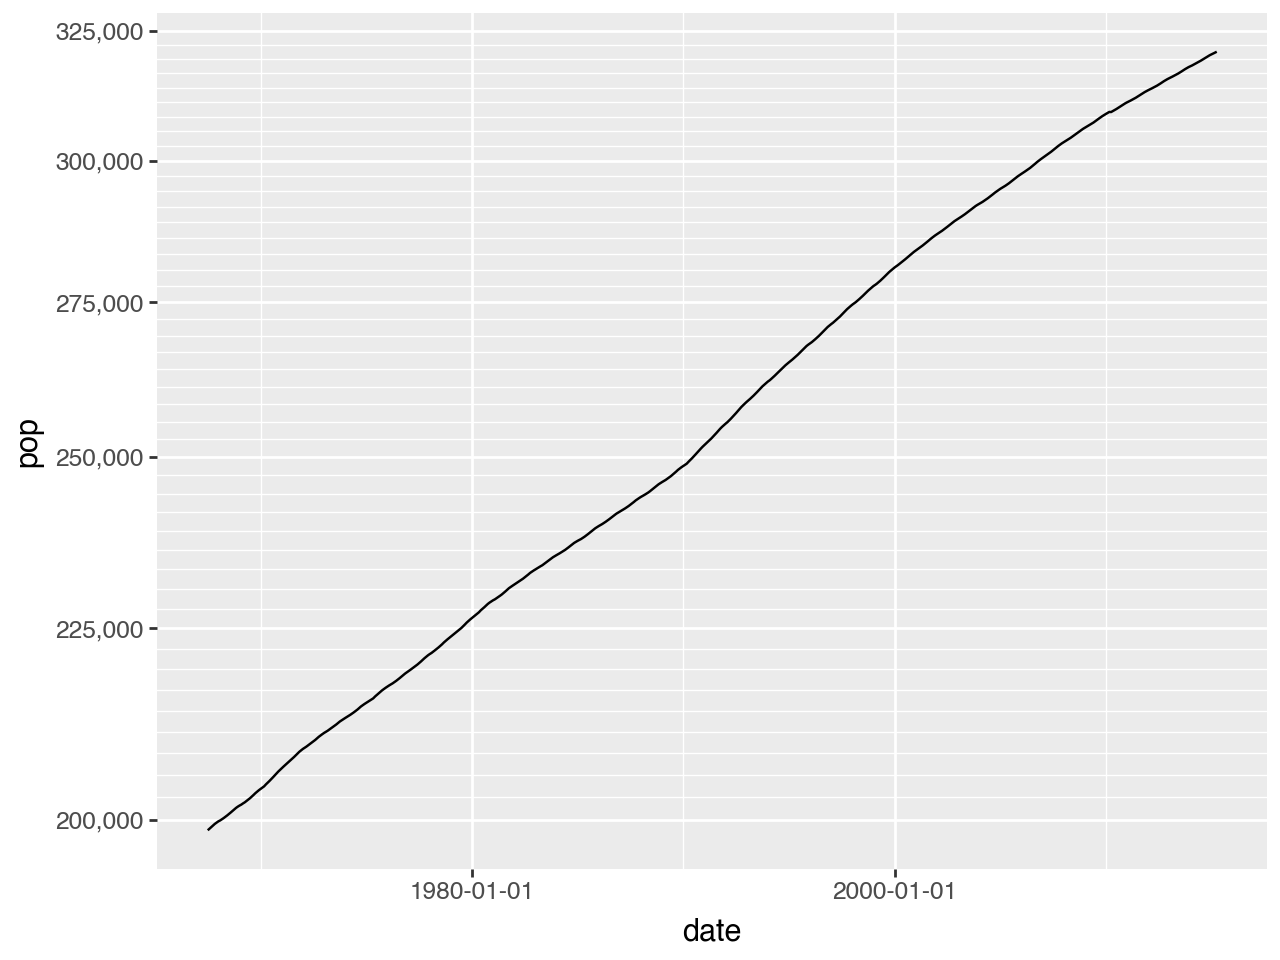

In [20]:
(
    pn.ggplot(data=economics, mapping=pn.aes(x="date",y="pop"))
    + pn.geom_line()
    + pn.scale_y_log10(labels=ml.label_comma())
    # + pn.scale_y_log10(labels=lambda l: ["{:,.0f}".format(v) for v in l])
)

# <a id='toc13_'></a>[Smoothening of a curve](#toc0_)

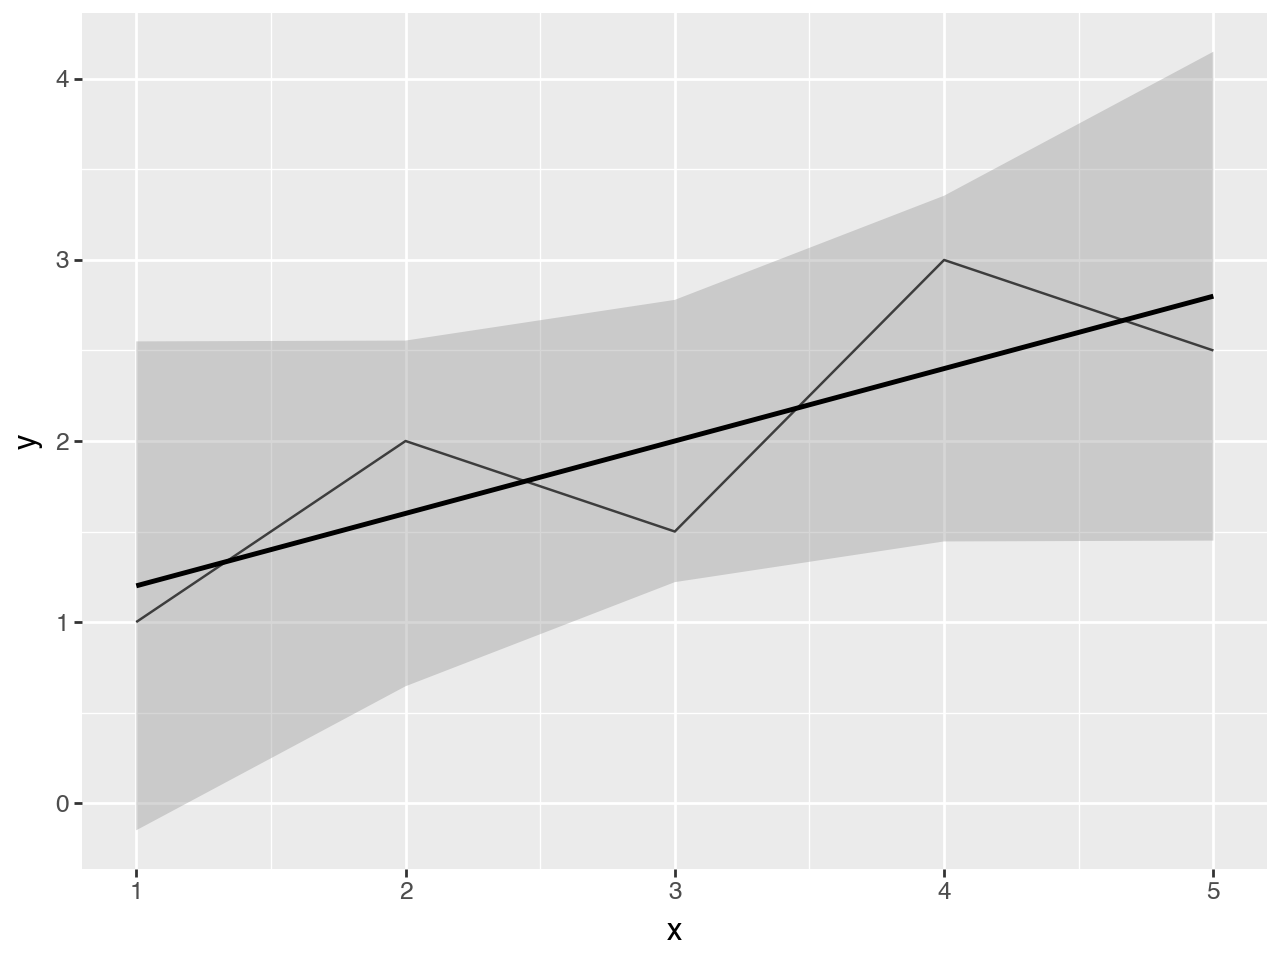

In [21]:
df = pd.DataFrame({
    "x": [1,2,3,4,5],
    "y": [1, 2, 1.5, 3, 2.5]
    })

(
    pn.ggplot(df, pn.aes(x="x", y="y"))
    + pn.geom_line()
    + pn.geom_smooth(method="lm") # loess
)

In [22]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# <a id='toc14_'></a>[Lines of different colours](#toc0_)

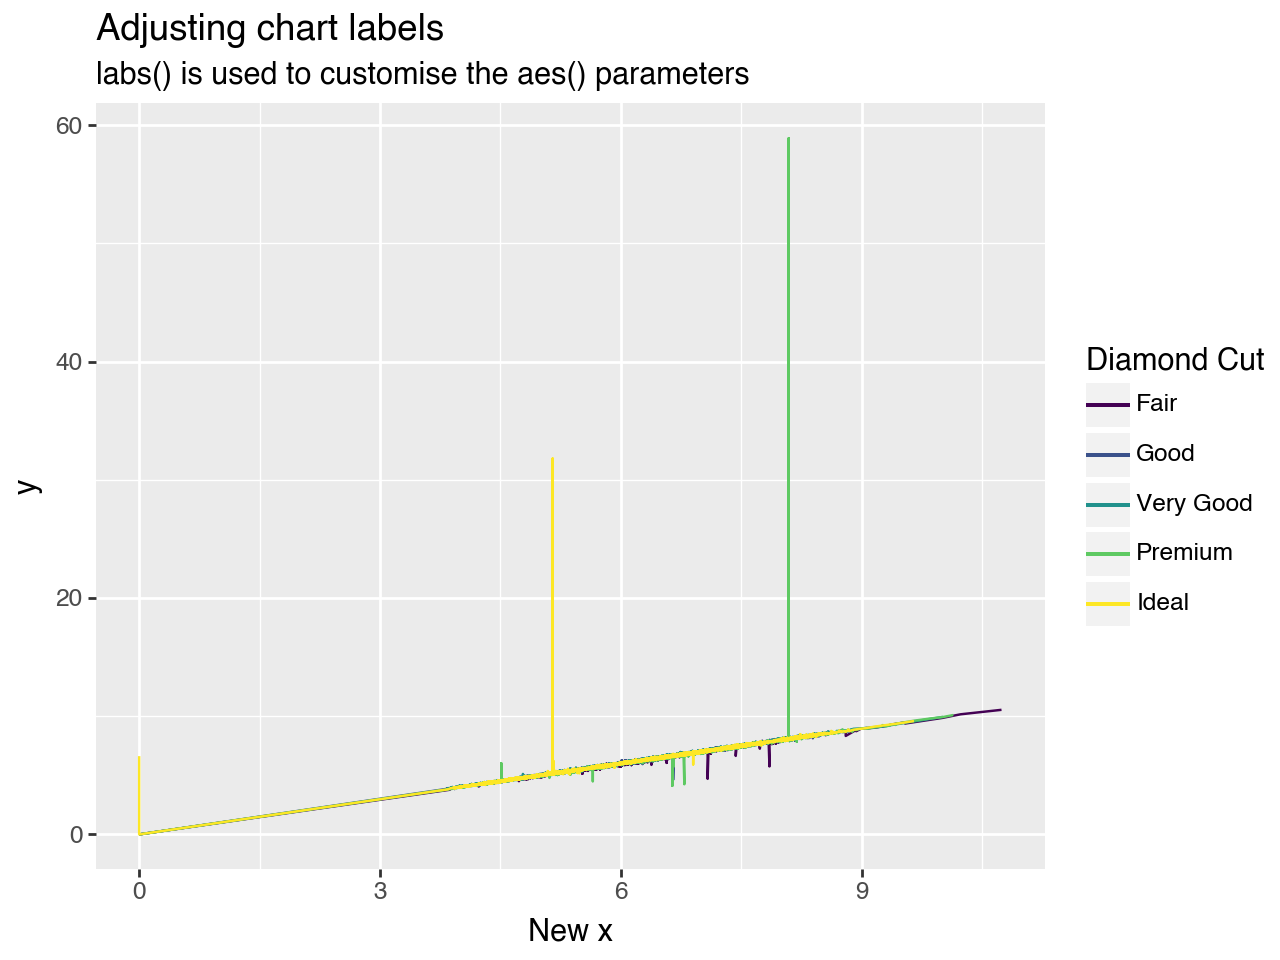

In [23]:
(
    pn.ggplot(data=diamonds, mapping=pn.aes(x="x", y="y", color="cut"))
    + pn.geom_line()
    + pn.labs(title="Adjusting chart labels", subtitle="labs() is used to customise the aes() parameters", color="Diamond Cut", x="New x")
)

In [77]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


# Assigning line colors manually (part 1)

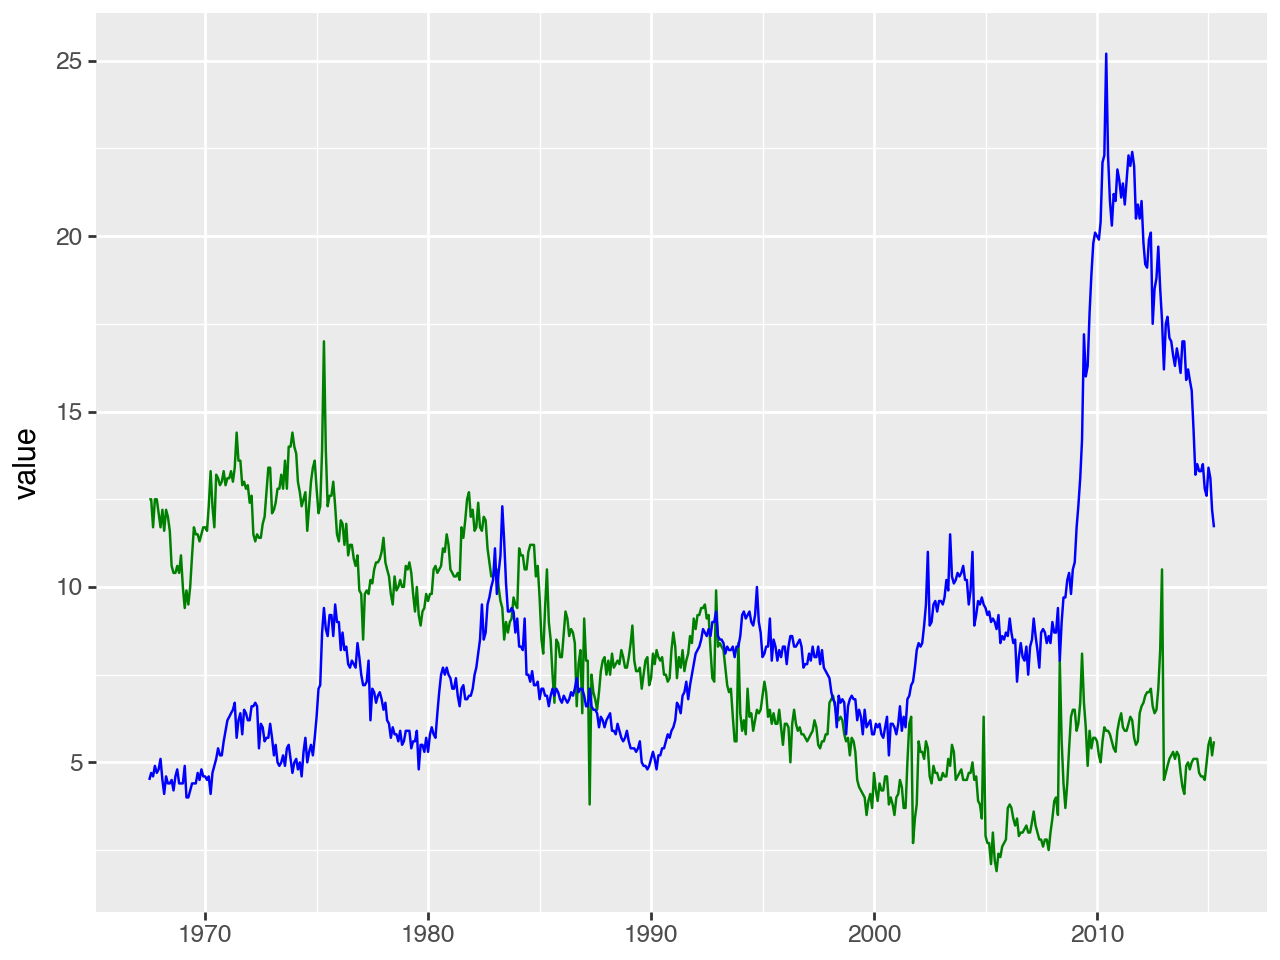

In [95]:
# The issue with this is that color is not inside aes()

(
    pn.ggplot(data=economics, mapping=pn.aes(x="date"))
    + pn.geom_line(pn.aes(y="psavert"), color="green")
    + pn.geom_line(pn.aes(y="uempmed"), color="blue")
    + pn.scale_x_datetime(breaks=mb.date_breaks("10 years"), labels=ml.date_format("%Y"))
    + pn.xlab("")
    + pn.ylab("value")
)

# Assigning line colors automatically

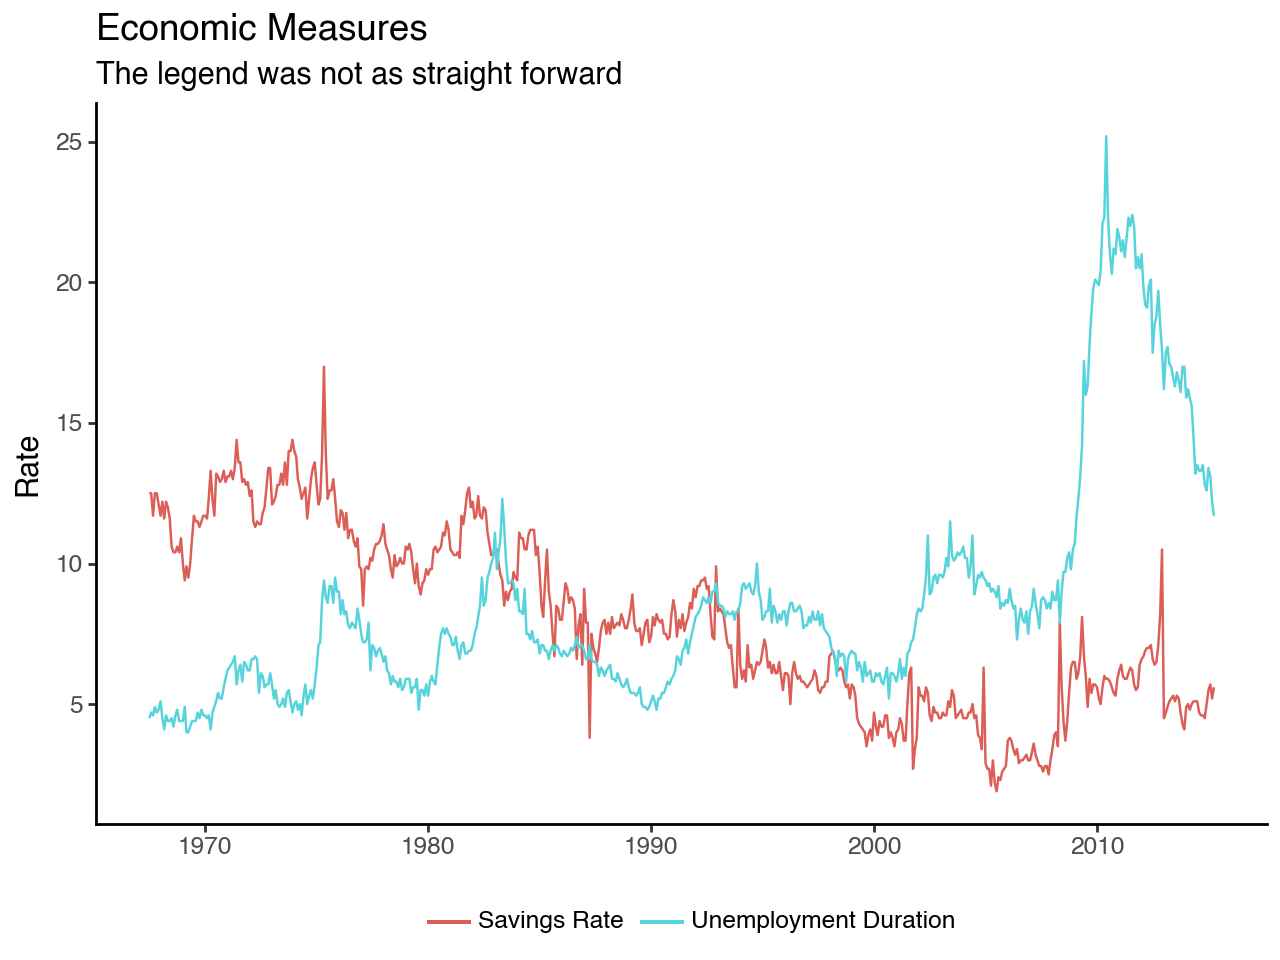

In [139]:
(
    pn.ggplot(data=economics, mapping=pn.aes(x="date"))
    + pn.geom_line(pn.aes(y="psavert", color='"Savings Rate"')) # note the single-double quotes
    + pn.geom_line(pn.aes(y="uempmed", color='"Unemployment Duration"'))
    + pn.scale_x_datetime(breaks=mb.date_breaks("10 years"), labels=ml.date_format("%Y"))
    + pn.theme_classic()
    + pn.theme(legend_position="bottom")
    # + pn.guides(color=pn.guide_legend(title=""))
    + pn.labs(
        title="Economic Measures", 
        subtitle="The legend was not as straight forward",
        x="",
        y="Rate",
        color="" # simpler than using guides()
    )
)

# Assigning colors manually (part 2)

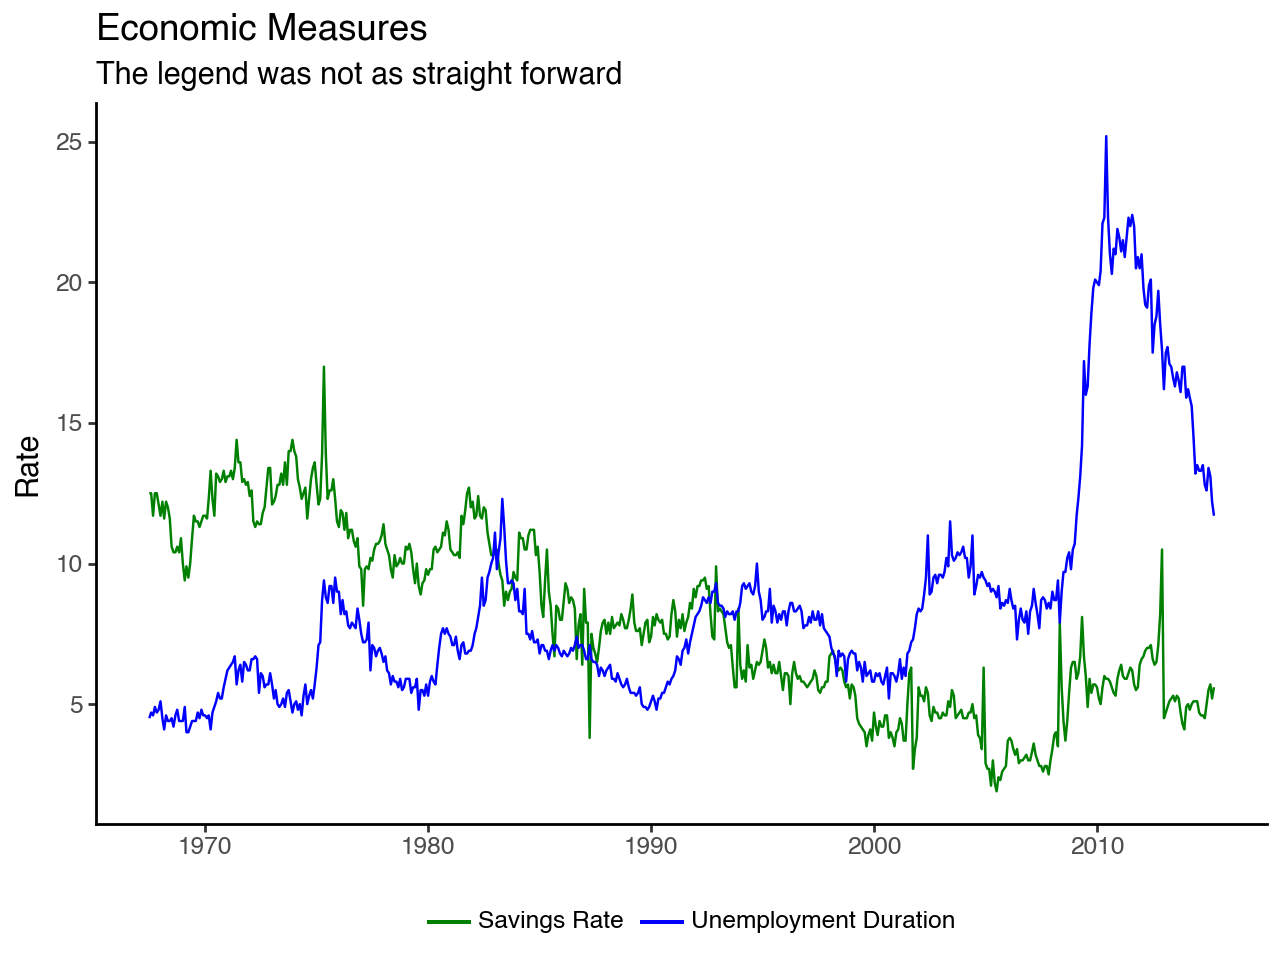

In [141]:
(
    pn.ggplot(data=economics, mapping=pn.aes(x="date"))
    + pn.geom_line(pn.aes(y="psavert", color='"Savings Rate"')) # note the single-double quotes
    + pn.geom_line(pn.aes(y="uempmed", color='"Unemployment Duration"'))
    + pn.scale_x_datetime(breaks=mb.date_breaks("10 years"), labels=ml.date_format("%Y"))
    + pn.theme_classic()
    + pn.theme(legend_position="bottom")
    + pn.labs(
        title="Economic Measures", 
        subtitle="The legend was not as straight forward",
        x="",
        y="Rate",
        color=""
    )
    + pn.scale_color_manual({"Savings Rate": "green", "Unemployment Duration": "blue"})
)

# <a id='toc15_'></a>[Histograms](#toc0_)

/Users/johnmwangi/opt/miniconda3/envs/interviews/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


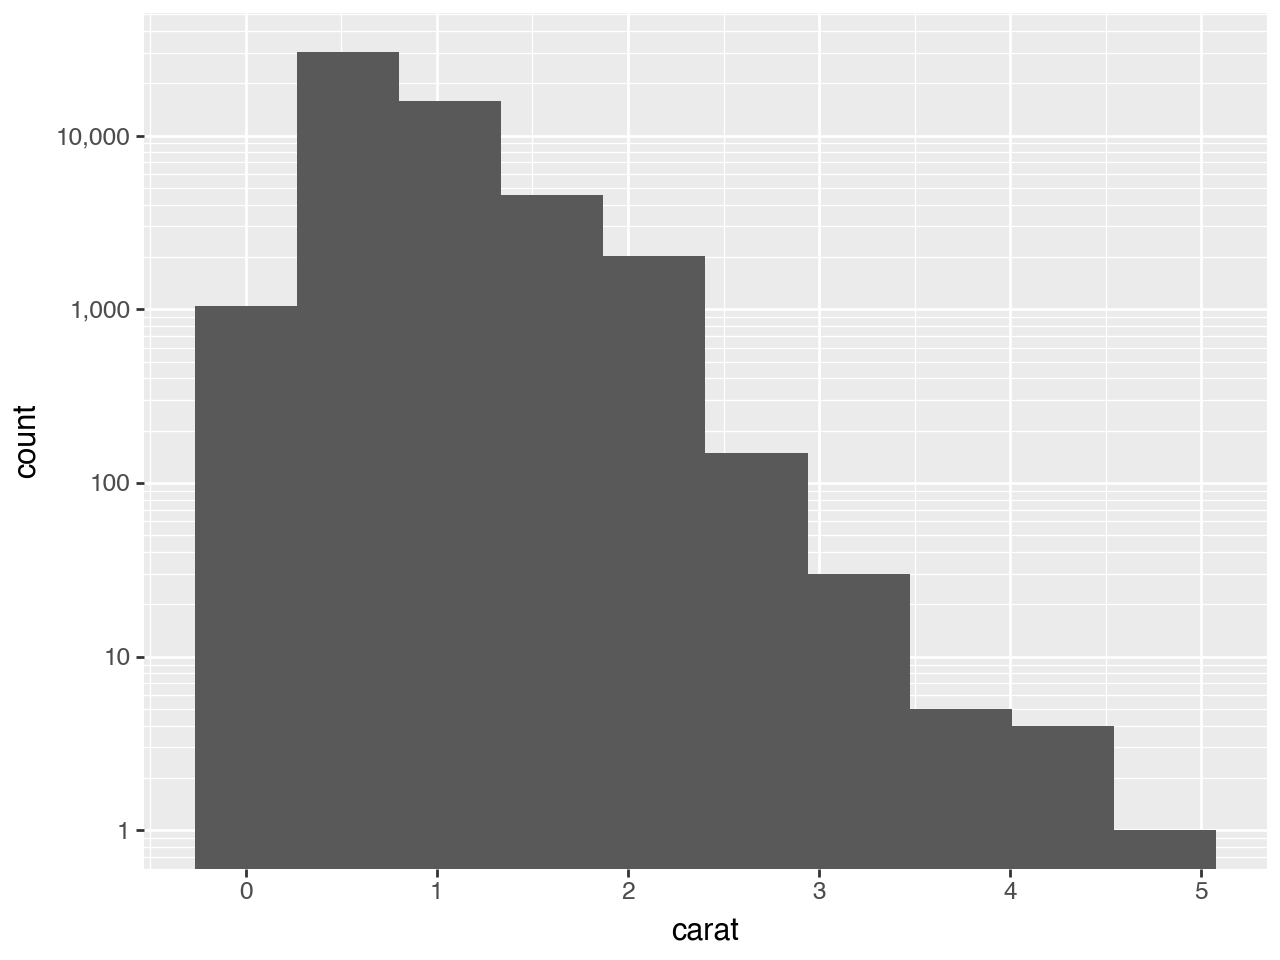

In [24]:
(
    pn.ggplot(data=diamonds, mapping=pn.aes(x="carat"))
    + pn.geom_histogram(bins=10)
    + pn.scale_y_log10(labels = ml.label_comma())
)

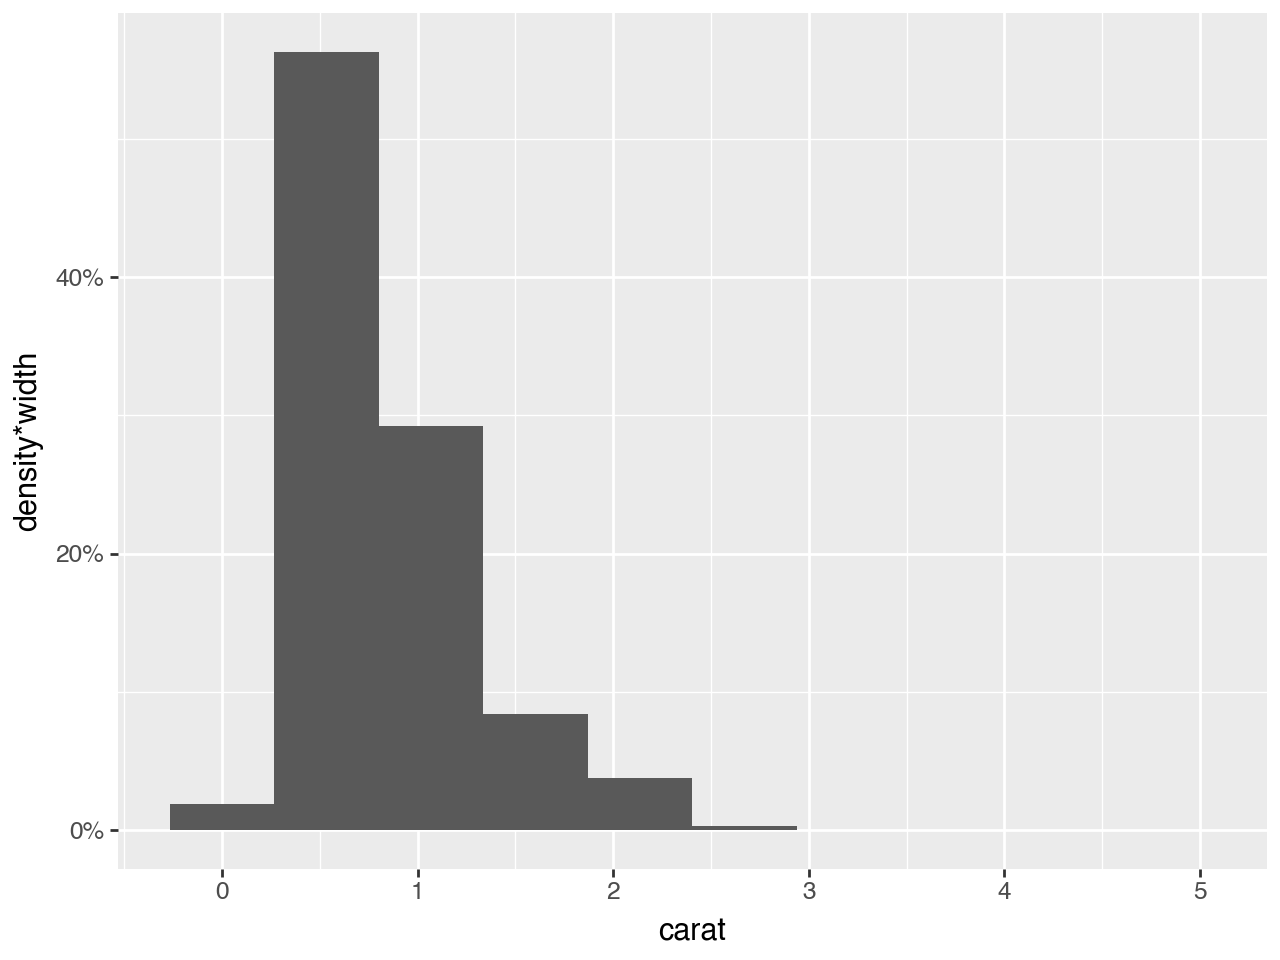

In [25]:
(
    pn.ggplot(data=diamonds, mapping=pn.aes(x="carat", y=pn.after_stat("density*width")))
    + pn.geom_histogram(bins=10)
    + pn.scale_y_continuous(labels=ml.percent_format())
)

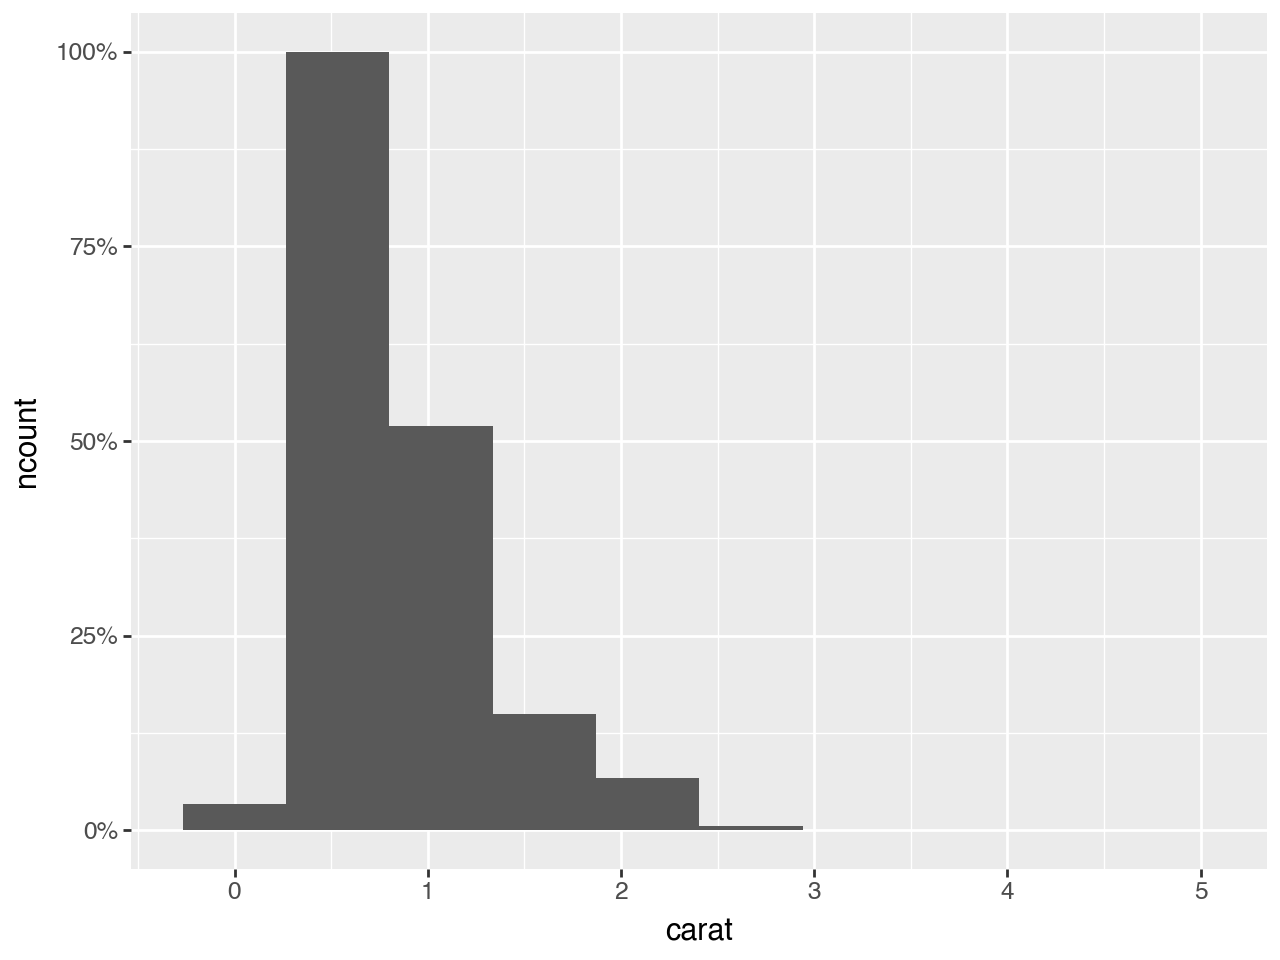

In [26]:
(
    pn.ggplot(data=diamonds, mapping=pn.aes(x="carat", y=pn.after_stat("ncount")))
    + pn.geom_histogram(bins=10)
    + pn.scale_y_continuous(labels=ml.percent_format())
)

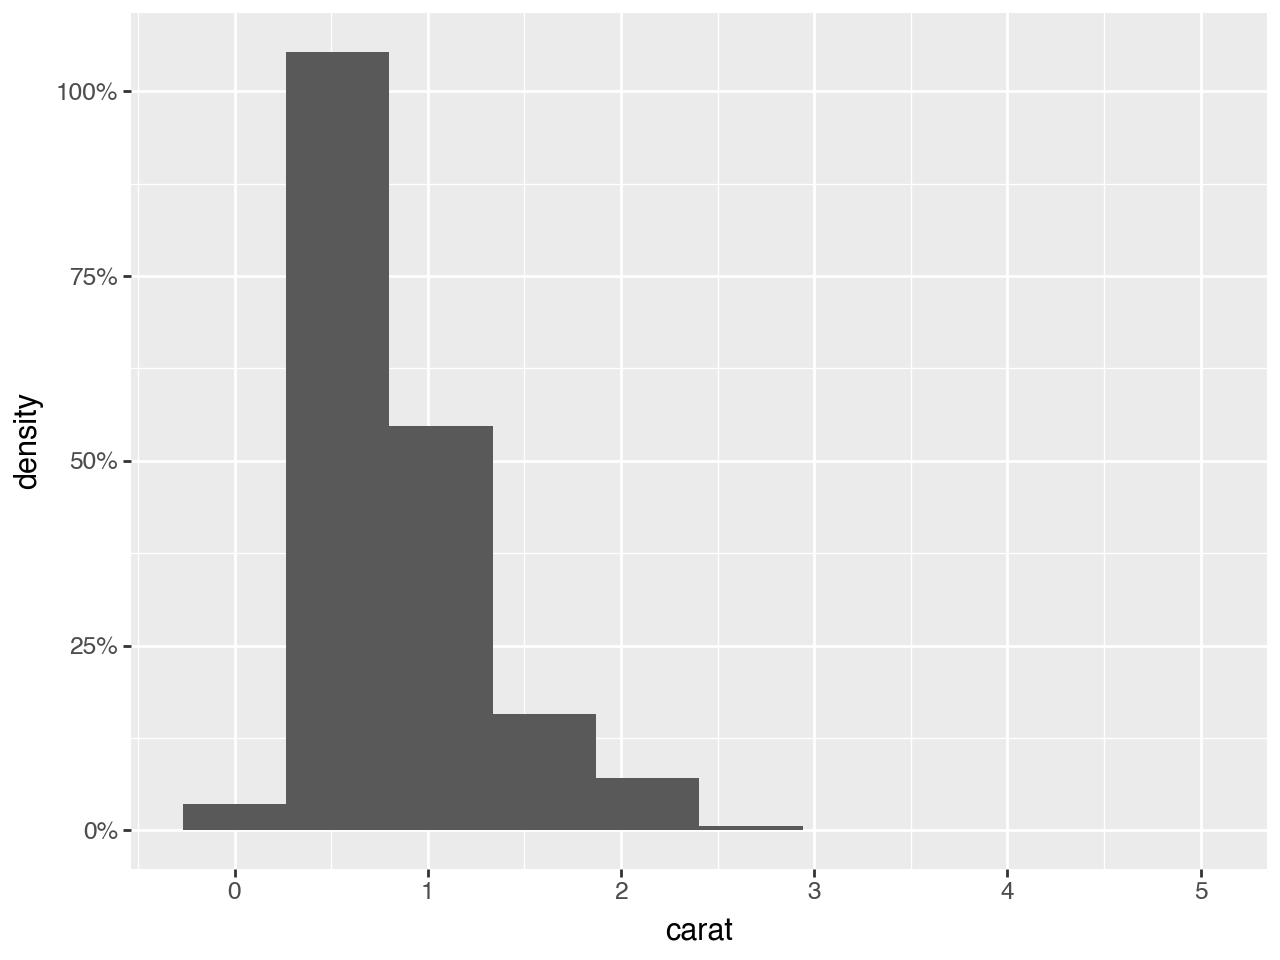

In [27]:
(
    pn.ggplot(data=diamonds, mapping=pn.aes(x="carat", y=pn.after_stat("density")))
    + pn.geom_histogram(bins=10)
    + pn.scale_y_continuous(labels=ml.percent_format())
)

/Users/johnmwangi/opt/miniconda3/envs/interviews/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/Users/johnmwangi/opt/miniconda3/envs/interviews/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


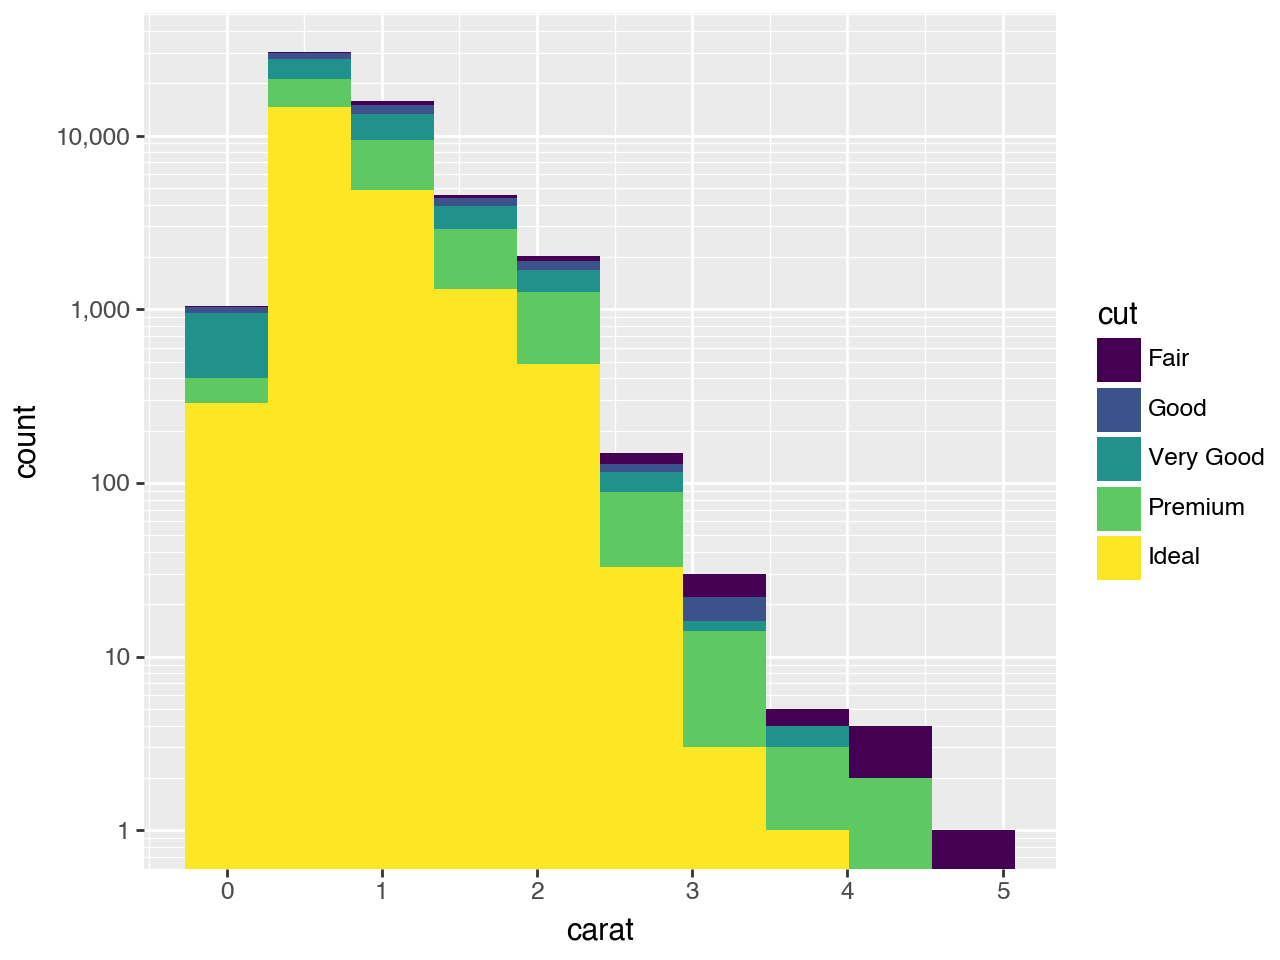

In [28]:
(
    pn.ggplot(diamonds, pn.aes(x="carat", fill="cut"))
    + pn.geom_histogram(bins=10)
    + pn.scale_y_log10(labels=ml.comma_format())
)

/Users/johnmwangi/opt/miniconda3/envs/interviews/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/Users/johnmwangi/opt/miniconda3/envs/interviews/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/Users/johnmwangi/opt/miniconda3/envs/interviews/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


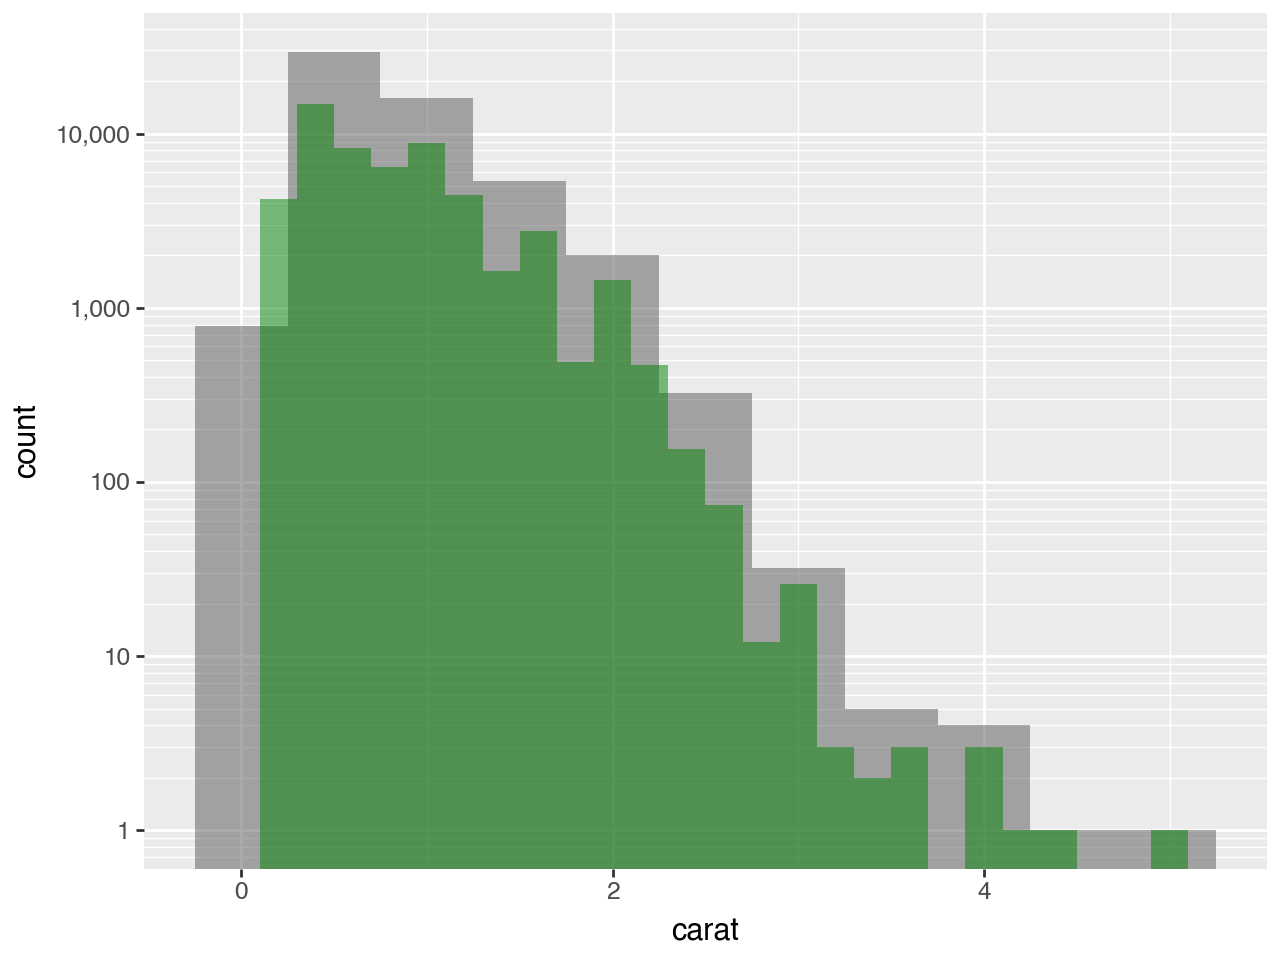

In [29]:
(
    pn.ggplot(diamonds, pn.aes(x="carat"))
    + pn.geom_histogram(binwidth=0.5, alpha=0.5)
    + pn.geom_histogram(binwidth=0.2, alpha=0.5, fill="green")
    + pn.scale_y_log10(labels=ml.comma_format())
)

# <a id='toc16_'></a>[Aggregates with custom functions](#toc0_)

In [30]:
def fn(ser):
    return sum(ser)

(
    mpg
    .groupby("manufacturer", as_index=False, observed=False)
    .aggregate(
        metric1 = ("hwy", lambda ser: sum(ser)),
        metric2 = ("hwy", lambda ser: fn(ser)),
    )
)

,manufacturer,metric1,metric2
0,audi,476,476
1,chevrolet,416,416
2,dodge,664,664
3,ford,484,484
4,honda,293,293
5,hyundai,376,376
6,jeep,141,141
7,land rover,66,66
8,lincoln,51,51
9,mercury,72,72


# Correlations heatmap

In [39]:
corrs = mtcars.select_dtypes(include="number").corr()
corrs

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [50]:
corrs_df = corrs.reset_index().melt(id_vars="index", value_name="correlation").sort_values("variable")
corrs_df

,index,variable,correlation
88,mpg,am,0.599832
90,disp,am,-0.591227
91,hp,am,-0.243204
92,drat,am,0.712711
93,wt,am,-0.692495
...,...,...,...
62,vs,wt,-0.554916
63,am,wt,-0.692495
64,gear,wt,-0.583287
55,mpg,wt,-0.867659


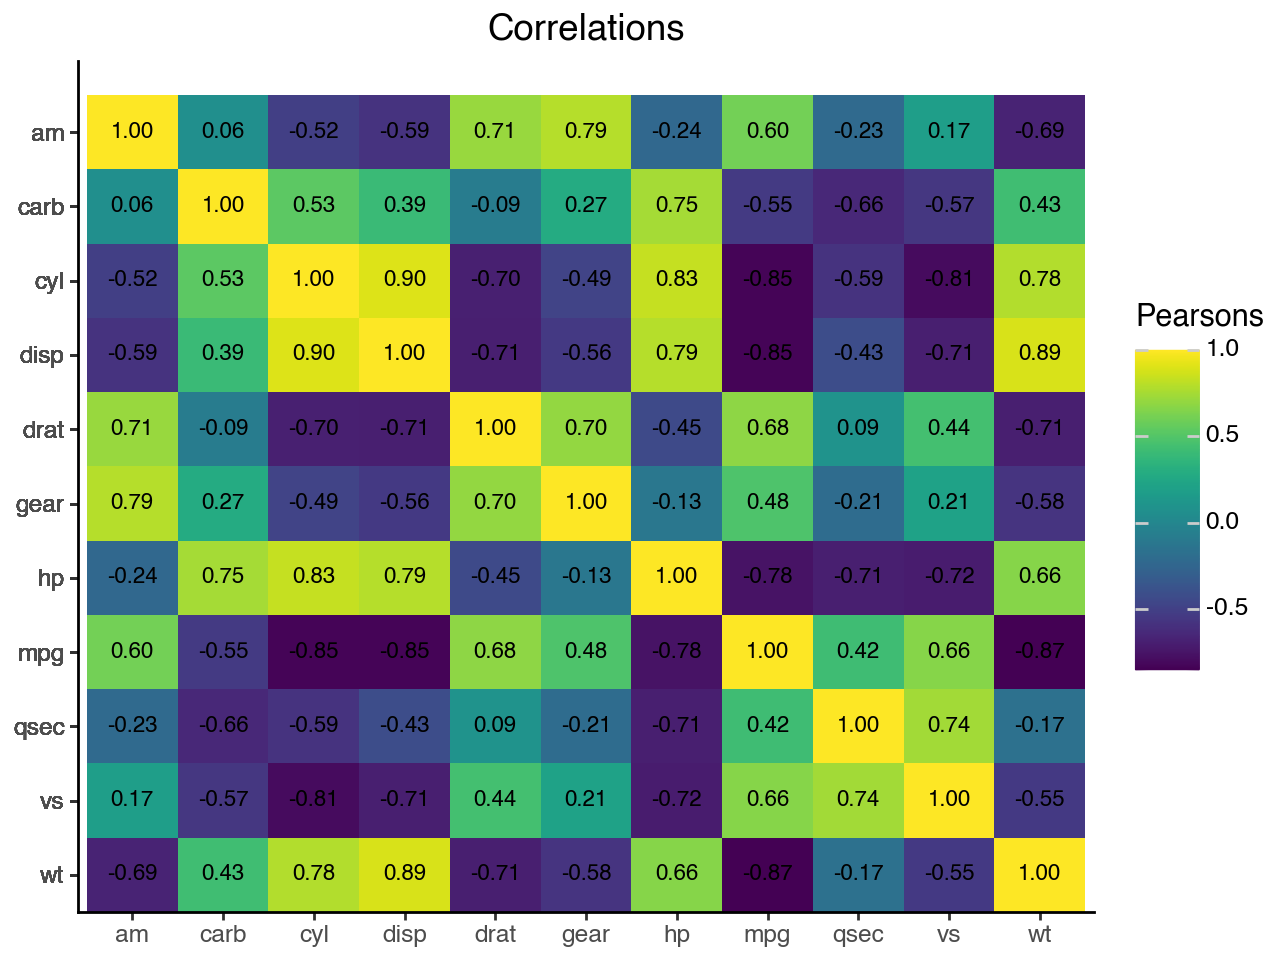

In [74]:
(
    pn.ggplot(data=corrs_df, mapping=pn.aes(x="index", y="variable", fill="correlation", label="correlation"))
    + pn.geom_tile()
    + pn.geom_text(format_string="{:.2f}", size=8)
    + pn.scale_y_discrete(limits=corrs_df.variable.tolist()[::-1])
    + pn.labs(title="Correlations", x="", y="", fill="Pearsons")
    + pn.theme_classic()
)